In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

dir = Path().resolve()
print('dir:', dir)
file_path = f'{dir}/data.csv'
df = pd.read_csv(file_path)
df = df.rename(columns={'created_at':'date', 'basket':'cost', 'user_id': 'id'})
# converting to real date time
df['date'] = pd.to_datetime(df.date)
del df['order_id']
df

dir: /home/sina/PycharmProjects/work_projects


,id,date,discount_cost,discount_type,cost
0,1,2021-04-12,10000,1.0,12000
1,2,2021-05-09,0,NaN,20000
2,3,2021-05-09,10000,1.0,14000
3,4,2021-11-10,0,NaN,15000
4,5,2021-11-10,10000,1.0,16000
...,...,...,...,...,...
29052,6622,2022-07-31,0,NaN,18000
29053,9985,2022-07-31,0,NaN,25000
29054,8843,2022-07-31,6000,1.0,24000
29055,8703,2022-07-31,0,NaN,40000


In [4]:
def plotter(xdata, ydata, xlabel, ylabel, title, figsize):
    plt.figure(figsize=figsize)
    plt.plot(xdata, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

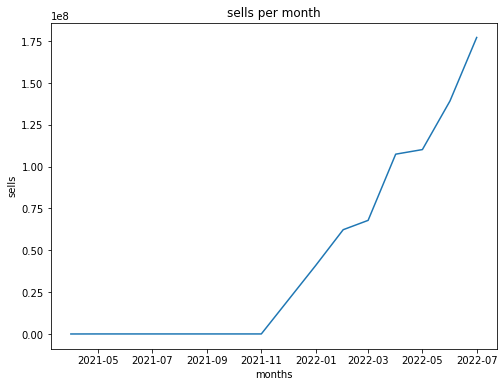

,date,cost
0,2021-04-01,12000
1,2021-05-01,34000
2,2021-11-01,31000
3,2022-01-01,40880710
4,2022-02-01,62325035
5,2022-03-01,67904080
6,2022-04-01,107466585
7,2022-05-01,110205586
8,2022-06-01,139261484
9,2022-07-01,177208595


In [11]:
# sells per month
df1 = df['cost'].groupby(df['date'].dt.to_period('M')).sum().reset_index()
dates = [pd.to_datetime(each.to_timestamp()) for each in df1.date]
df1.date = dates
plotter(df1.date, df1.cost, 'months', 'sells', 'sells per month', (8, 6))
df1

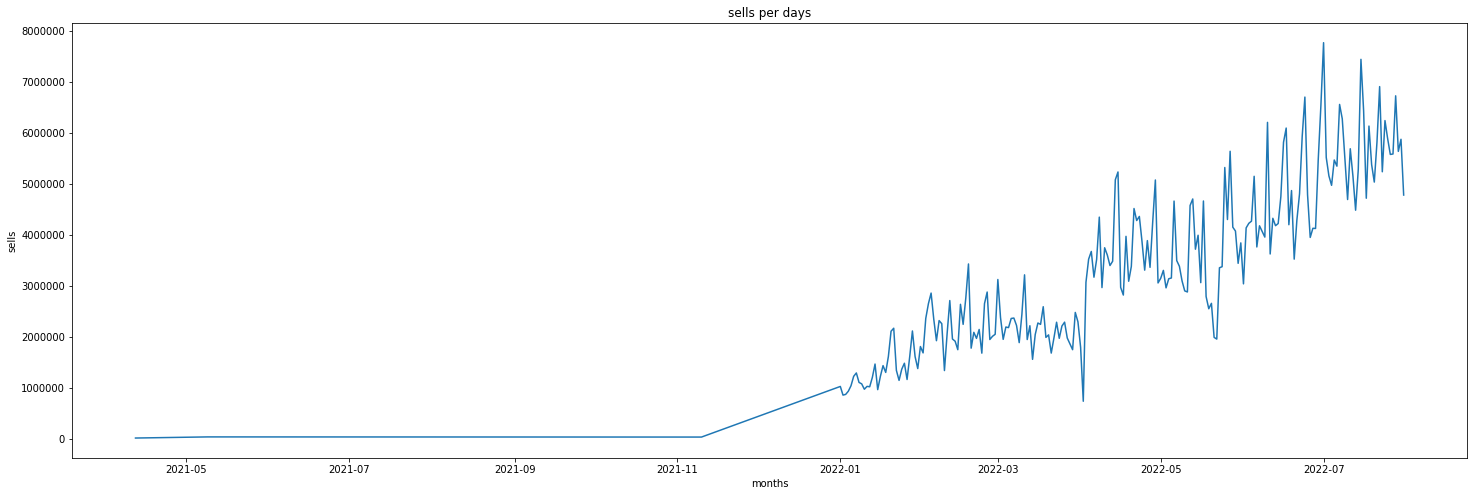

,date,cost
0,2021-04-12,12000
1,2021-05-09,34000
2,2021-11-10,31000
3,2022-01-01,1024000
4,2022-01-02,854000
...,...,...
210,2022-07-27,5583800
211,2022-07-28,6725000
212,2022-07-29,5635150
213,2022-07-30,5872380


In [12]:
# sells per day
df1 = df['cost'].groupby(df['date'].dt.to_period('D')).sum().reset_index()
dates = [pd.to_datetime(each.to_timestamp()) for each in df1.date]
df1.date = dates
plotter(df1.date, df1.cost, 'months', 'sells', 'sells per days', (25, 8))
df1

In [27]:
df2 = df.groupby(['id', df['date'].dt.to_period('M')]).sum()
df2[['discount_cost', 'cost']]

discount_cost   cost
id   date                         
1    2021-04          10000  12000
     2022-03              0  11400
     2022-05              0   6800
2    2021-05              0  20000
     2022-06              0  41000
...                     ...    ...
9981 2022-07          10000  24000
9982 2022-07              0  30000
9983 2022-07              0  21000
9984 2022-07              0  22000
9985 2022-07              0  25000

[17340 rows x 2 columns]

In [22]:
t = df2['cost'].reset_index()

t

,id,date,cost
0,1,2021-04,12000
1,1,2022-03,11400
2,1,2022-05,6800
3,2,2021-05,20000
4,2,2022-06,41000
...,...,...,...
17335,9981,2022-07,24000
17336,9982,2022-07,30000
17337,9983,2022-07,21000
17338,9984,2022-07,22000


In [226]:
# each month sell
# df1 = df['cost'].groupby(df['date'].dt.to_period('M')).sum().reset_index()
df1 = df.groupby(df['date'].dt.strftime('%B-%Y'))['cost'].sum().sort_index()
# df1['date'] = list(df1['date'])
# df1['date'] = pd.to_datetime(df1.date)
# df1 = df1.set_index('date')
# df1 = df['cost'].groupby(df['date'].dt.to_period('M')).sum()
# df1 = df['cost'].groupby(df['date'].dt.to_timestamp('M')).sum()
# df1['date'] = pd.to_timestamp(df1.date)
# df1['date'] = pd.to_datetime(df1.date.to_timestamp())
# df1.date
# plt.plot(df1)
# plt.show()
df1

date
April-2021           12000
April-2022       107466585
February-2022     62325035
January-2022      40880710
July-2022        177208595
June-2022        139261484
March-2022        67904080
May-2021             34000
May-2022         110205586
November-2021        31000
Name: cost, dtype: int64

In [227]:
df1 = pd.DataFrame(df1)

In [225]:
df1

,cost
date,
April-2021,12000
April-2022,107466585
February-2022,62325035
January-2022,40880710
July-2022,177208595
June-2022,139261484
March-2022,67904080
May-2021,34000
May-2022,110205586


In [204]:
pd.to_datetime(df1.date.to_timestamp())

AttributeError: module 'pandas' has no attribute 'to_pydatetime'

In [205]:
df1.date.values

array([Period('2021-04', 'M'), Period('2021-05', 'M'),
       Period('2021-11', 'M'), Period('2022-01', 'M'),
       Period('2022-02', 'M'), Period('2022-03', 'M'),
       Period('2022-04', 'M'), Period('2022-05', 'M'),
       Period('2022-06', 'M'), Period('2022-07', 'M')], dtype=object)

In [196]:
# df1['date'] = pd.to_datetime(df1['date'])
df1.index=df1.index.to_series().astype(str)


dtype('O')

In [193]:
df1.

[Period('2021-04', 'M'),
 Period('2021-05', 'M'),
 Period('2021-11', 'M'),
 Period('2022-01', 'M'),
 Period('2022-02', 'M'),
 Period('2022-03', 'M'),
 Period('2022-04', 'M'),
 Period('2022-05', 'M'),
 Period('2022-06', 'M'),
 Period('2022-07', 'M')]

In [16]:
print('discount types:', list(df['discount_type'].unique()))

discount types: [1.0, nan, 2.0]


In [23]:
df[df['basket'].isna()]
df[df['basket'].isnull()]

,order_id,user_id,created_at,discount_cost,discount_type,basket


In [24]:
np.average(df['basket'])

24273.981312592492

In [28]:
df['user_id'].unique().shape

(9985,)

In [95]:
df1 = df.copy(deep=True)
df1 = df1.groupby('Date').basket.sum()
df1 = df1.groupby(df1.index.month).cumsum().reset_index()
print(df1)

          Date     basket
0   2021-04-12      12000
1   2021-05-09      34000
2   2021-11-10      31000
3   2022-01-01    1024000
4   2022-01-02    1878000
..         ...        ...
210 2022-07-27  154197740
211 2022-07-28  160922740
212 2022-07-29  166557890
213 2022-07-30  172430270
214 2022-07-31  177208595

[215 rows x 2 columns]


In [110]:
df1 = df.copy(deep=True)
df1['Date'] = pd.to_datetime(df1.created_at)
df1 = df1.groupby('Date').basket.sum()
df1 = df1.groupby(df1.index.month).cumsum().reset_index()
print(df1)

          Date     basket
0   2021-04-12      12000
1   2021-05-09      34000
2   2021-11-10      31000
3   2022-01-01    1024000
4   2022-01-02    1878000
..         ...        ...
210 2022-07-27  154197740
211 2022-07-28  160922740
212 2022-07-29  166557890
213 2022-07-30  172430270
214 2022-07-31  177208595

[215 rows x 2 columns]


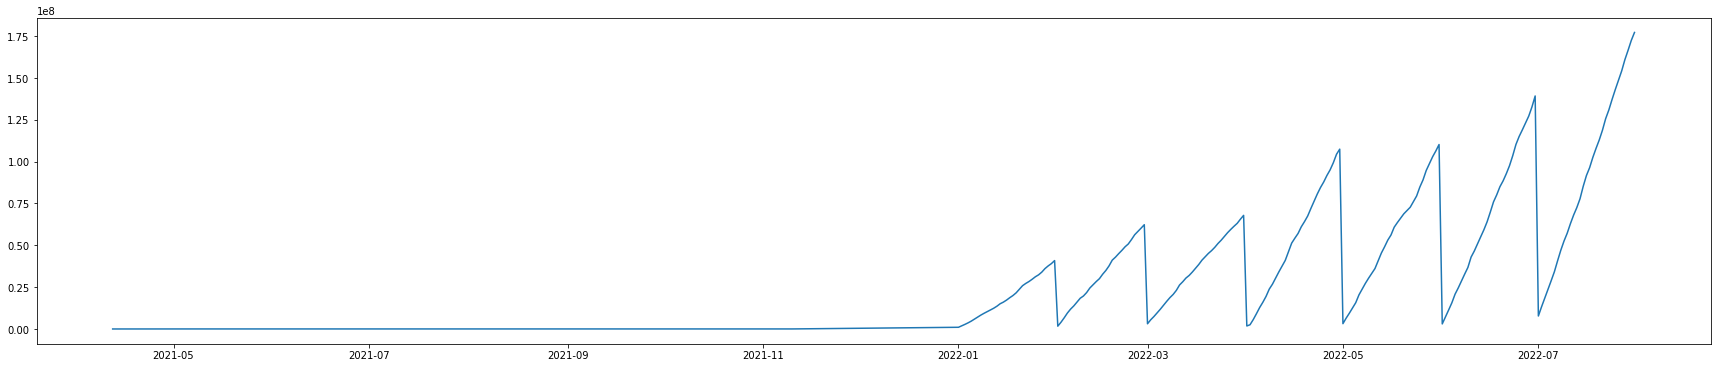

In [111]:
plt.figure(figsize=(30, 6))
plt.plot(df1.Date, df1.basket)
plt.show()

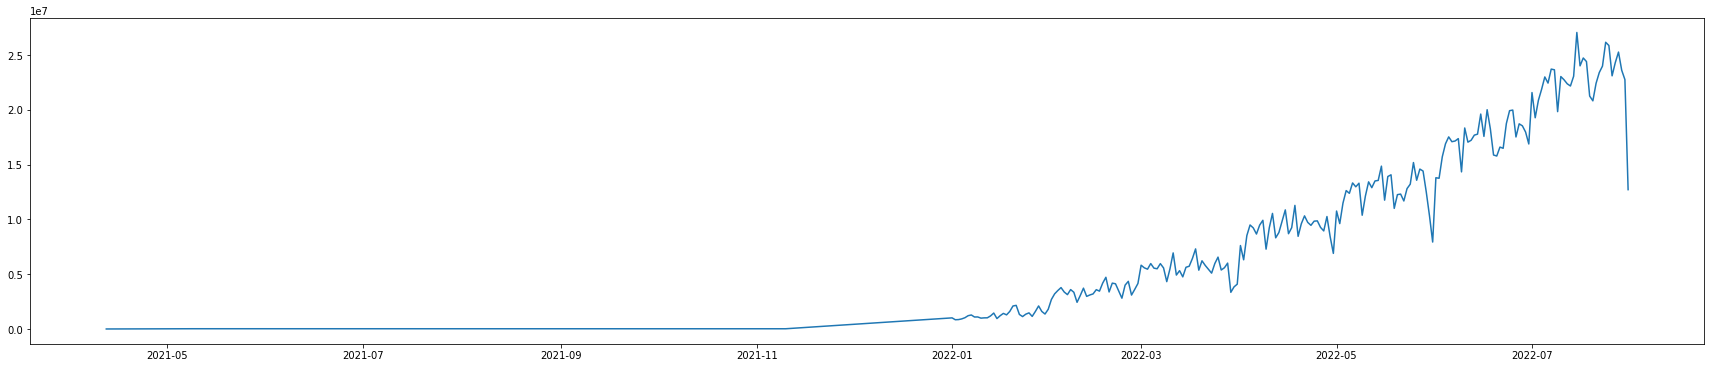

          Date    basket
0   2021-04-12     12000
1   2021-05-09     34000
2   2021-11-10     31000
3   2022-01-01   1024000
4   2022-01-02    854000
..         ...       ...
210 2022-07-27  24302330
211 2022-07-28  25260938
212 2022-07-29  23606000
213 2022-07-30  22754111
214 2022-07-31  12716815

[215 rows x 2 columns]


In [107]:
df2 = df.copy(deep=True)
df2['Date'] = pd.to_datetime(df2.created_at)
df2 = df2.groupby('Date').basket.sum()
df2 = df2.groupby(df2.index.day).cumsum().reset_index()
plt.figure(figsize=(30, 6))
plt.plot(df2.Date, df2.basket)
plt.show()
print (df2)

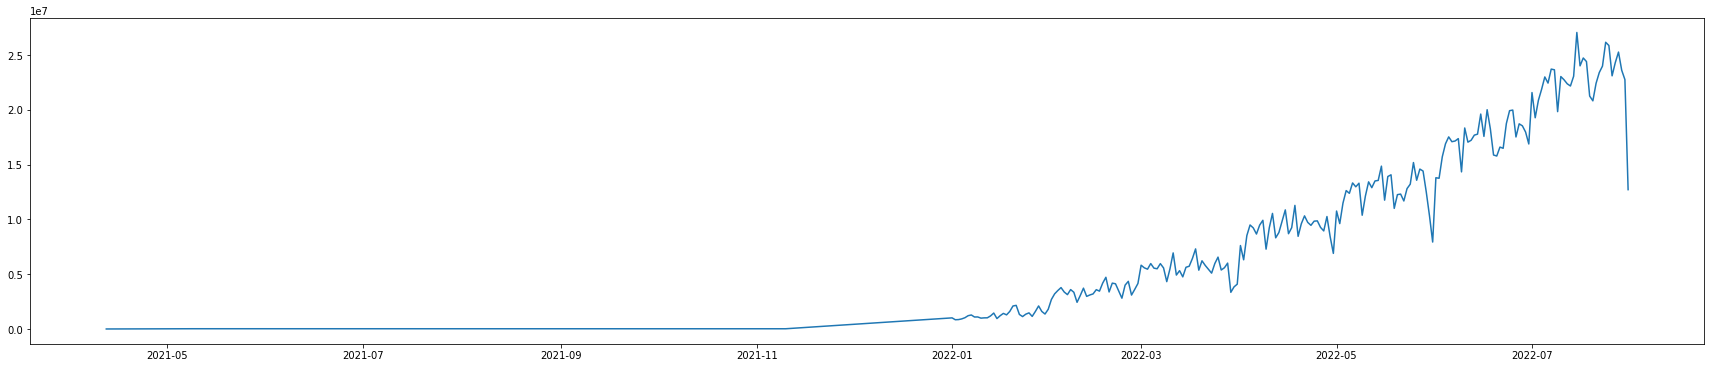

In [104]:
plt.figure(figsize=(30, 6))
plt.plot(df2.Date, df2.basket)
plt.show()